# Extracción(E - Extract)

In [123]:
#extraemos la data en formato json desde el API. Verificamos su estructura basica y configuracion
import pandas as pd

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

df = pd.read_json(url)

df.head()
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


(7267, 6)

# Transformación (T - Transform)

In [124]:
#se necesita desanidar todas las columnas, por lo que cada columna es enviada a un diccionario y luego plasmada en una nueva tabla total
df_total = pd.json_normalize(df.to_dict(orient='records'))

df_total.head()
df_total.info()
df_total.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

(7267, 21)

In [125]:
#Hacemos una comprobación de incoherencias en los datos

#valores nulos: No se ubican valores nulos
df_total.isnull().sum().sort_values(ascending=False)

#registros duplicados, Primero verificamos por lineas y luego por CustomerID: No se ubican valores duplicados.
df_total.duplicated().sum()
df_total['customerID'].duplicated().sum()

#errores de formato por celdas: Se verifica que account.Charges.Total esta como object, sin embargo deberia ser una columna float
df_total.dtypes

#verificacion de columnas categoricas. 
    #- Churn tiene datos en blanco a parte de "no" y "yes"
    #- phone.MultipleLines tiene el dato "No phone service" a parte de "no" y "yes"
    #- internet.OnlineSecurity tiene el dato "No internet service" a parte de "no" y "yes"
    #- internet.OnlineBackup tiene el dato "No internet service" a parte de "no" y "yes"
    #- internet.DeviceProtection tiene el dato "No internet service" a parte de "no" y "yes"
    #- internet.TechSupport tiene el dato "No internet service" a parte de "no" y "yes"
    #- internet.StreamingTV tiene el dato "No internet service" a parte de "no" y "yes"
    #- internet.StreamingMovies tiene el dato "No internet service" a parte de "no" y "yes"

columnas_categoricas = df_total.select_dtypes(include='object').columns

for col in columnas_categoricas:
    print(f"\n{col}")
    print(df_total[col].value_counts())


customerID
customerID
0002-ORFBO    1
0003-MKNFE    1
0004-TLHLJ    1
0011-IGKFF    1
0013-EXCHZ    1
             ..
9987-LUTYD    1
9992-RRAMN    1
9992-UJOEL    1
9993-LHIEB    1
9995-HOTOH    1
Name: count, Length: 7267, dtype: int64

Churn
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

customer.gender
customer.gender
Male      3675
Female    3592
Name: count, dtype: int64

customer.Partner
customer.Partner
No     3749
Yes    3518
Name: count, dtype: int64

customer.Dependents
customer.Dependents
No     5086
Yes    2181
Name: count, dtype: int64

phone.PhoneService
phone.PhoneService
Yes    6560
No      707
Name: count, dtype: int64

phone.MultipleLines
phone.MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64

internet.InternetService
internet.InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64

internet.OnlineSecurity
internet.OnlineSecurity
No  

In [126]:
#Manejo de inconsistencias

#convertimos account.Charges.Total en columna numerica, estandarizando los campos en blanco con NaN

df_total['account.Charges.Total'] = (
    pd.to_numeric(df_total['account.Charges.Total'], errors='coerce')
)

df_total['account.Charges.Total'].fillna(0, inplace=True)

#normalizacion de variables categoricas: 
    #- columna Churn

df_total['Churn'] = df_total['Churn'].replace(' ', 'No')

    #- columna phone.MultipleLines

df_total['phone.MultipleLines'] = (
    df_total['phone.MultipleLines'].replace('No phone service', 'No')
)

    #- columnas que contienen "No internet service" en lugar de "No"

internet_cols = [
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies'
]

df_total[internet_cols] = df_total[internet_cols].replace('No internet service', 'No'
)

#validameos correcciones

for col in columnas_categoricas:
    print(f"\n{col}")
    print(df_total[col].value_counts())

df_total.dtypes



customerID
customerID
0002-ORFBO    1
0003-MKNFE    1
0004-TLHLJ    1
0011-IGKFF    1
0013-EXCHZ    1
             ..
9987-LUTYD    1
9992-RRAMN    1
9992-UJOEL    1
9993-LHIEB    1
9995-HOTOH    1
Name: count, Length: 7267, dtype: int64

Churn
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

customer.gender
customer.gender
Male      3675
Female    3592
Name: count, dtype: int64

customer.Partner
customer.Partner
No     3749
Yes    3518
Name: count, dtype: int64

customer.Dependents
customer.Dependents
No     5086
Yes    2181
Name: count, dtype: int64

phone.PhoneService
phone.PhoneService
Yes    6560
No      707
Name: count, dtype: int64

phone.MultipleLines
phone.MultipleLines
No     4202
Yes    3065
Name: count, dtype: int64

internet.InternetService
internet.InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64

internet.OnlineSecurity
internet.OnlineSecurity
No     5189
Yes    2078
Name: count, dtype: int64

inte

customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total        float64
dtype: object

In [127]:
# Creación de la columna Cuentas_diarias
    # normalizamos el numero de días del mes a 30

df_total['Cuentas_Diarias'] = df_total['account.Charges.Monthly'] / 30

    #hacemos un redondeo a 2 decimales
    
df_total['Cuentas_Diarias'] = df_total['Cuentas_Diarias'].round(2)



In [128]:
    # Hacemos las verificaciones de la ultima columna creada

df_total[['account.Charges.Monthly', 'Cuentas_Diarias']].head()

df_total[['account.Charges.Monthly', 'Cuentas_Diarias']].dtypes


account.Charges.Monthly    float64
Cuentas_Diarias            float64
dtype: object

In [129]:
# Estandarización y transformación de datos
    # Como priimer paso, vamos a transformar las columnas binarias por 1 y 0 en caso sea YES o NO respectivamente

columnas_binarias = [
    'Churn',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'phone.MultipleLines',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'account.PaperlessBilling'
]

df_total[columnas_binarias] = df_total[columnas_binarias].replace({
    'Yes': 1,
    'No': 0
})


C:\Users\david\AppData\Local\Temp\ipykernel_6788\613684423.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_total[columnas_binarias] = df_total[columnas_binarias].replace({


In [130]:
    # ahora procedemos al renombramiento de columnas según el diccionario dado

renombre_columnas = {
    'customerID': 'id_cliente',
    'Churn': 'abandono_cliente',
    'customer.gender': 'genero',
    'customer.SeniorCitizen': 'adulto_mayor',
    'customer.Partner': 'tiene_pareja',
    'customer.Dependents': 'tiene_dependientes',
    'customer.tenure': 'antiguedad_meses',
    'phone.PhoneService': 'servicio_telefonico',
    'phone.MultipleLines': 'lineas_multiples',
    'internet.InternetService': 'servicio_internet',
    'internet.OnlineSecurity': 'seguridad_online',
    'internet.OnlineBackup': 'respaldo_online',
    'internet.DeviceProtection': 'proteccion_dispositivo',
    'internet.TechSupport': 'soporte_tecnico',
    'internet.StreamingTV': 'streaming_tv',
    'internet.StreamingMovies': 'streaming_peliculas',
    'account.Contract': 'tipo_contrato',
    'account.PaperlessBilling': 'facturacion_digital',
    'account.PaymentMethod': 'metodo_pago',
    'account.Charges.Monthly': 'cargo_mensual',
    'account.Charges.Total': 'cargo_total',
    'Cuentas_Diarias': 'cargo_diario'
}

df_total = df_total.rename(columns=renombre_columnas)


In [131]:
    # validamos el renombramiento

df_total.info()
df_total.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7267 non-null   object 
 1   abandono_cliente        7267 non-null   object 
 2   genero                  7267 non-null   object 
 3   adulto_mayor            7267 non-null   int64  
 4   tiene_pareja            7267 non-null   int64  
 5   tiene_dependientes      7267 non-null   int64  
 6   antiguedad_meses        7267 non-null   int64  
 7   servicio_telefonico     7267 non-null   int64  
 8   lineas_multiples        7267 non-null   int64  
 9   servicio_internet       7267 non-null   object 
 10  seguridad_online        7267 non-null   int64  
 11  respaldo_online         7267 non-null   int64  
 12  proteccion_dispositivo  7267 non-null   int64  
 13  soporte_tecnico         7267 non-null   int64  
 14  streaming_tv            7267 non-null   

,id_cliente,abandono_cliente,genero,adulto_mayor,tiene_pareja,tiene_dependientes,antiguedad_meses,servicio_telefonico,lineas_multiples,servicio_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,facturacion_digital,metodo_pago,cargo_mensual,cargo_total,cargo_diario
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


# Carga y análisis(L - Load & Analysis)

In [132]:
# Procedemos a hacer un analisis de los datos en tabla

    # de manera general:

df_total.describe()


,adulto_mayor,tiene_pareja,tiene_dependientes,antiguedad_meses,servicio_telefonico,lineas_multiples,seguridad_online,respaldo_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,facturacion_digital,cargo_mensual,cargo_total,cargo_diario
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2277.182035,2.157292
std,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.648587,1.004407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.610000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.180000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000,2.340000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.995000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


In [133]:
    # Segmentamos solo por columnas numéricas:

columnas_numericas = [
    'antiguedad_meses',
    'cargo_mensual',
    'cargo_total',
    'cargo_diario'
]

df_total[columnas_numericas].describe()


,antiguedad_meses,cargo_mensual,cargo_total,cargo_diario
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,32.346498,64.720098,2277.182035,2.157292
std,24.571773,30.129572,2268.648587,1.004407
min,0.000000,18.250000,0.000000,0.610000
25%,9.000000,35.425000,396.200000,1.180000
50%,29.000000,70.300000,1389.200000,2.340000
75%,55.000000,89.875000,3778.525000,2.995000
max,72.000000,118.750000,8684.800000,3.960000


In [134]:
    # Segmentamos por columnas binarias

df_total['abandono_cliente'] = (
    df_total['abandono_cliente']
    .replace('', 0)
    .astype(int)
)


columnas_binarias = [
    'abandono_cliente',
    'adulto_mayor',
    'tiene_pareja',
    'tiene_dependientes',
    'servicio_telefonico',
    'lineas_multiples',
    'facturacion_digital'
]

df_total[columnas_binarias].mean()




C:\Users\david\AppData\Local\Temp\ipykernel_6788\2842009953.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace('', 0)


abandono_cliente       0.257190
adulto_mayor           0.162653
tiene_pareja           0.484106
tiene_dependientes     0.300124
servicio_telefonico    0.902711
lineas_multiples       0.421770
facturacion_digital    0.593230
dtype: float64

In [135]:
    # Segmentacion por columnas categoricas

df_total.describe(include='object')



,id_cliente,genero,servicio_internet,tipo_contrato,metodo_pago
count,7267,7267,7267,7267,7267
unique,7267,2,3,3,4
top,0002-ORFBO,Male,Fiber optic,Month-to-month,Electronic check
freq,1,3675,3198,4005,2445


In [136]:
# distribucion de evasión (graficas)

    # frecuencia absoluta
df_total['abandono_cliente'].value_counts()

abandono_cliente
0    5398
1    1869
Name: count, dtype: int64

In [137]:
    # Frecuencia relativa

df_total['abandono_cliente'].value_counts(normalize=True) * 100

abandono_cliente
0    74.280996
1    25.719004
Name: proportion, dtype: float64

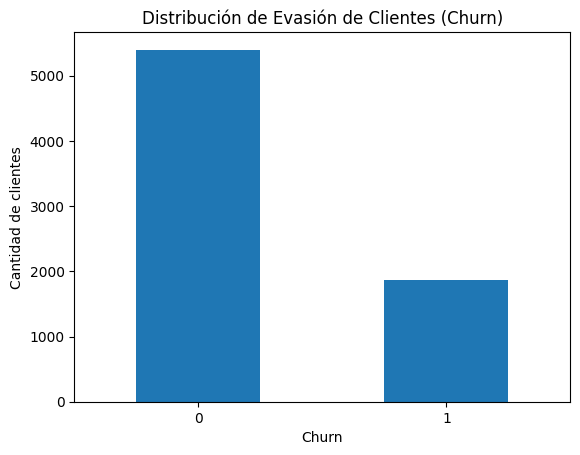

In [138]:
    #visualizacion por grafico de barras (cantioodades absolutas)

import matplotlib.pyplot as plt

churn_counts = df_total['abandono_cliente'].value_counts()

plt.figure()
churn_counts.plot(kind='bar')
plt.title('Distribución de Evasión de Clientes (Churn)')
plt.xlabel('Churn')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=0)
plt.show()




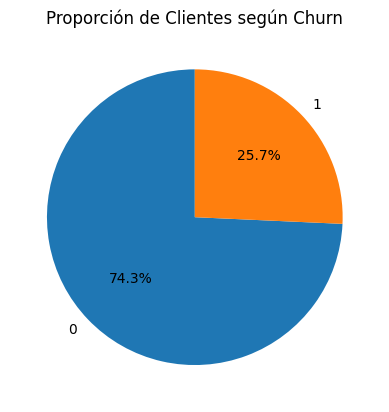

In [139]:
    #visualizacion por grafico de pie (cantioodades relativas)

plt.figure()
churn_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.title('Proporción de Clientes según Churn')
plt.show()


In [140]:
# Recuento de evasión por variables categóricas

df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7267 non-null   object 
 1   abandono_cliente        7267 non-null   int64  
 2   genero                  7267 non-null   object 
 3   adulto_mayor            7267 non-null   int64  
 4   tiene_pareja            7267 non-null   int64  
 5   tiene_dependientes      7267 non-null   int64  
 6   antiguedad_meses        7267 non-null   int64  
 7   servicio_telefonico     7267 non-null   int64  
 8   lineas_multiples        7267 non-null   int64  
 9   servicio_internet       7267 non-null   object 
 10  seguridad_online        7267 non-null   int64  
 11  respaldo_online         7267 non-null   int64  
 12  proteccion_dispositivo  7267 non-null   int64  
 13  soporte_tecnico         7267 non-null   int64  
 14  streaming_tv            7267 non-null   

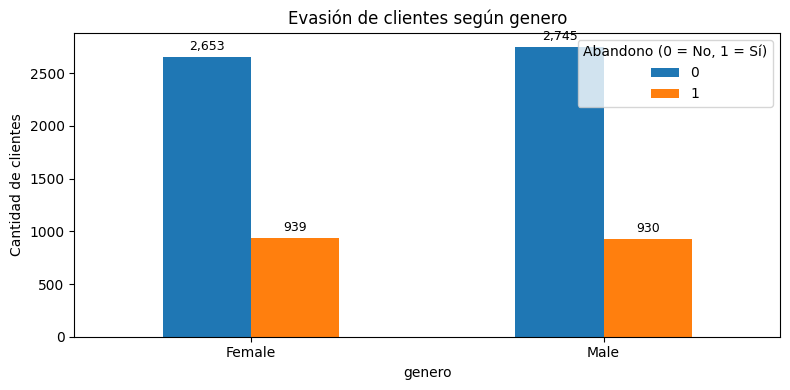

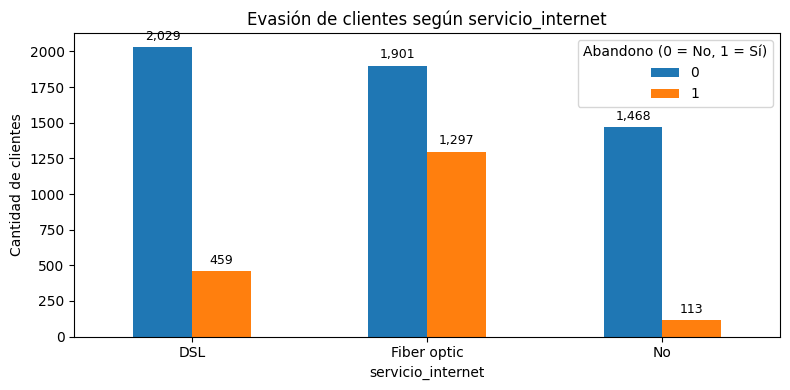

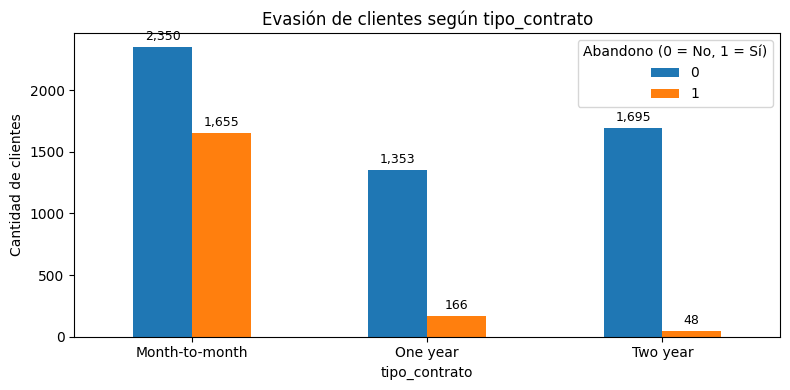

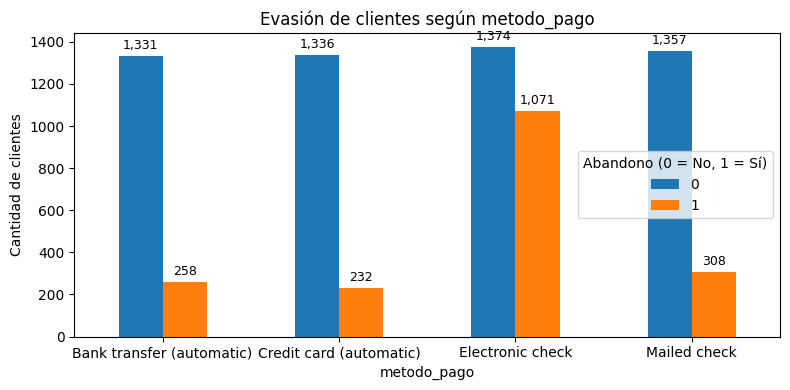

In [153]:
   # agrupamos las variables categoricas

variables_categoricas = [
    'genero',
    'servicio_internet',
    'tipo_contrato',
    'metodo_pago'
]

    # Recuento ABSOLUTO de evasion de clientes por cada categoria:

def agregar_etiquetas_barras(ax, fontsize=9):
    for container in ax.containers:
        ax.bar_label(
            container,
            labels=[f"{int(v):,}" for v in container.datavalues],
            label_type='edge',
            padding=3,
            fontsize=fontsize
        )


for col in variables_categoricas:
    tabla = pd.crosstab(df_total[col], df_total['abandono_cliente'])

    ax = tabla.plot(
        kind='bar',
        figsize=(8,4)
    )

    plt.title(f'Evasión de clientes según {col}')
    plt.xlabel(col)
    plt.ylabel('Cantidad de clientes')
    plt.xticks(rotation=0)
    plt.legend(title='Abandono (0 = No, 1 = Sí)')
    plt.tight_layout()

    agregar_etiquetas_barras(ax, fontsize=9)

    plt.show()

In [142]:
    # Frecuencia RELATIVA de evasion de clientes por cada categoria: Se mostrará en tablas para uina mejor comprension

def tabla_tasa_evasion(df, columna_categoria):
    tabla = (
        df
        .groupby(columna_categoria)
        .agg(
            total_clientes=('abandono_cliente', 'count'),
            clientes_evadidos=('abandono_cliente', 'sum')
        )
        .assign(
            **{
                '%_evasion_pct': lambda x: round(
                    (x['clientes_evadidos'] / x['total_clientes']) * 100, 2
                )
            }
        )
        .sort_values('%_evasion_pct', ascending=False)
    )

    return tabla


In [143]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

def tabla_visual_color(df, titulo):
    fig, ax = plt.subplots(figsize=(8, 2 + len(df) * 0.6))
    ax.axis('off')

    columnas = df.columns.tolist()
    filas = df.index.tolist()
    valores = df.values

    # Normalización del color según % de evasión
    norm = mcolors.Normalize(
        vmin=df['%_evasion_pct'].min(),
        vmax=df['%_evasion_pct'].max()
    )

    # Colormap más suave
    cmap = plt.cm.OrRd

    tabla = ax.table(
        cellText=[
            [
                f"{int(v):,}" if isinstance(v, (int, float)) and col != '%_evasion_pct'
                else f"{v:.2f}%" if col == '%_evasion_pct'
                else v
                for v, col in zip(row, columnas)
            ]
            for row in valores
        ],
        rowLabels=filas,
        colLabels=columnas,
        cellLoc='center',
        loc='center'
    )

    tabla.auto_set_font_size(False)
    tabla.set_fontsize(10)
    tabla.scale(1, 1.5)

    col_idx = columnas.index('%_evasion_pct')

    for i in range(len(df)):
        cell = tabla[i + 1, col_idx]
        value = df.iloc[i, col_idx]

        # Color base del mapa
        base_color = cmap(norm(value))

        # Mezclar con blanco para suavizar
        suavizado = np.array(base_color[:3]) * 0.7 + np.array([1, 1, 1]) * 0.3
        cell.set_facecolor(suavizado)

        # Ajustar color del texto según luminancia
        luminancia = np.dot(suavizado, [0.299, 0.587, 0.114])
        texto_color = 'black' if luminancia > 0.6 else 'white'

        cell.set_text_props(color=texto_color, weight='bold')

    ax.set_title(titulo, fontsize=13, fontweight='bold')
    plt.show()


tabla_genero = tabla_tasa_evasion(df_total, 'genero')
tabla_contrato = tabla_tasa_evasion(df_total, 'tipo_contrato')
tabla_internet = tabla_tasa_evasion(df_total, 'servicio_internet')
tabla_pago = tabla_tasa_evasion(df_total, 'metodo_pago')


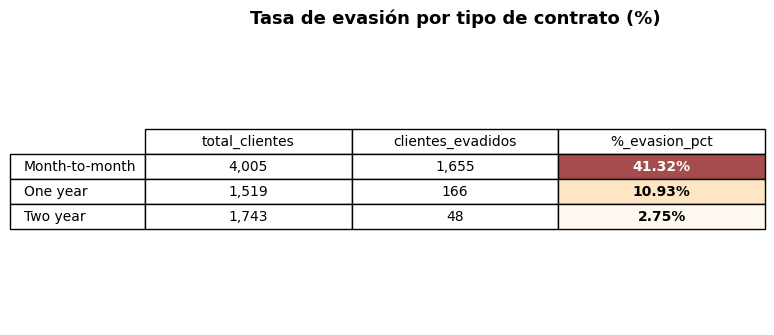

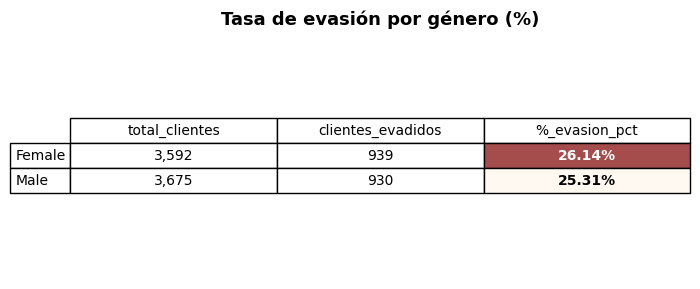

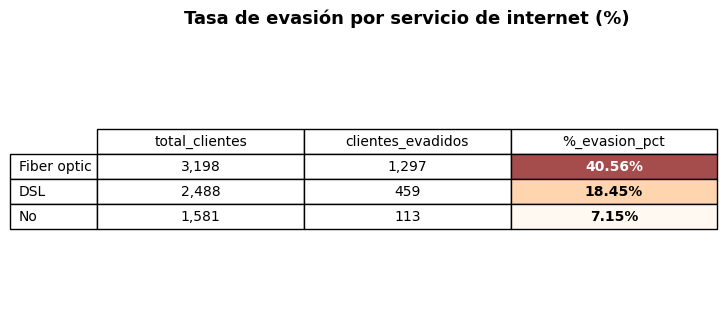

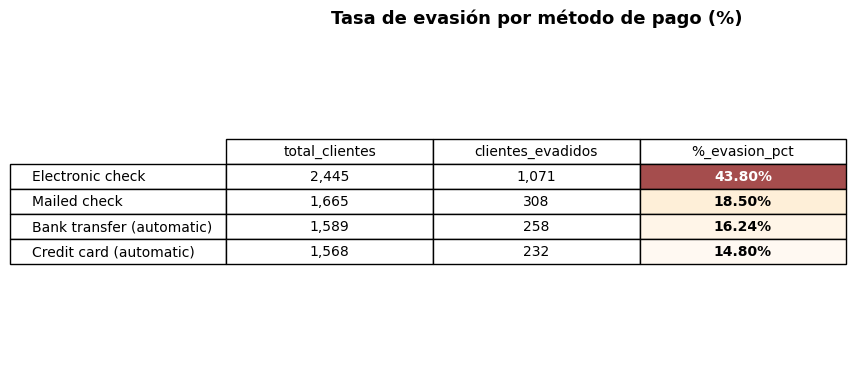

In [144]:
tabla_visual_color(tabla_contrato,'Tasa de evasión por tipo de contrato (%)')
tabla_visual_color(tabla_genero, 'Tasa de evasión por género (%)')
tabla_visual_color(tabla_internet, 'Tasa de evasión por servicio de internet (%)')
tabla_visual_color(tabla_pago, 'Tasa de evasión por método de pago (%)')


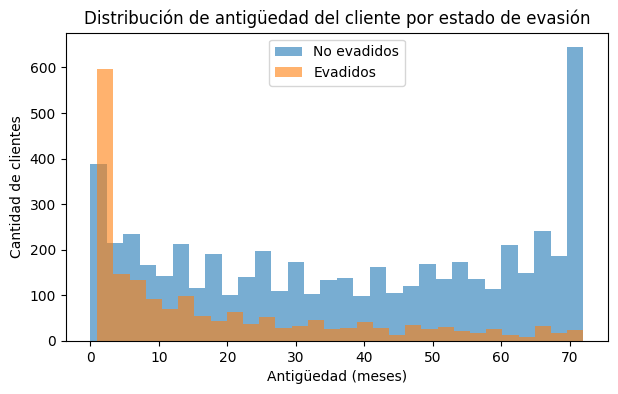

In [145]:
# Conteo de evasión por variables numéricas:

    # Antigüedad del cliente vs evasión

plt.figure(figsize=(7,4))
plt.hist(
    df_total[df_total['abandono_cliente'] == 0]['antiguedad_meses'],
    bins=30,
    alpha=0.6,
    label='No evadidos'
)

plt.hist(
    df_total[df_total['abandono_cliente'] == 1]['antiguedad_meses'],
    bins=30,
    alpha=0.6,
    label='Evadidos'
)

plt.title('Distribución de antigüedad del cliente por estado de evasión')
plt.xlabel('Antigüedad (meses)')
plt.ylabel('Cantidad de clientes')
plt.legend()
plt.show()

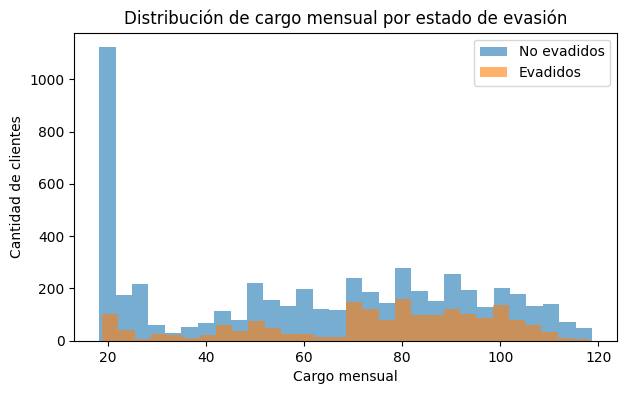

In [146]:
    ## Cargo mensual vs evasión

plt.figure(figsize=(7,4))
plt.hist(
    df_total[df_total['abandono_cliente'] == 0]['cargo_mensual'],
    bins=30,
    alpha=0.6,
    label='No evadidos'
)

plt.hist(
    df_total[df_total['abandono_cliente'] == 1]['cargo_mensual'],
    bins=30,
    alpha=0.6,
    label='Evadidos'
)

plt.title('Distribución de cargo mensual por estado de evasión')
plt.xlabel('Cargo mensual')
plt.ylabel('Cantidad de clientes')
plt.legend()
plt.show()


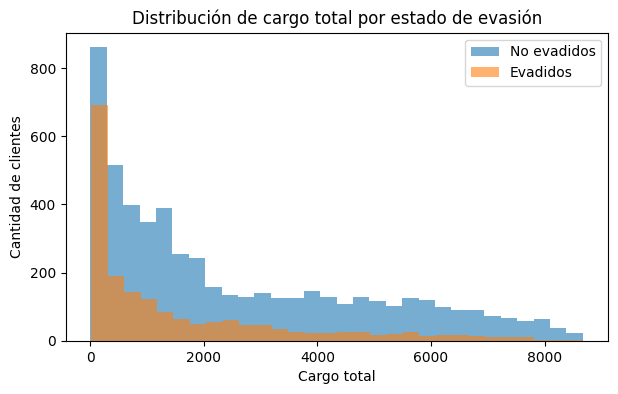

In [147]:
    # Cargo total acumulado vs evasión

plt.figure(figsize=(7,4))
plt.hist(
    df_total[df_total['abandono_cliente'] == 0]['cargo_total'],
    bins=30,
    alpha=0.6,
    label='No evadidos'
)

plt.hist(
    df_total[df_total['abandono_cliente'] == 1]['cargo_total'],
    bins=30,
    alpha=0.6,
    label='Evadidos'
)

plt.title('Distribución de cargo total por estado de evasión')
plt.xlabel('Cargo total')
plt.ylabel('Cantidad de clientes')
plt.legend()
plt.show()


# Informe Final



## 1. Introducción

El objetivo de este análisis es comprender el comportamiento de evasión de clientes (Churn) y detectar patrones asociados a distintas características del cliente. La evasión representa una pérdida directa de ingresos, por lo que identificar los perfiles con mayor riesgo permite diseñar estrategias efectivas de retención.

## 2. Limpieza y Tratamiento de Datos

Se realizó la importación y revisión del dataset, verificando valores nulos y tipos de datos. Las variables categóricas fueron estandarizadas y se calcularon métricas clave como el total de clientes, clientes evadidos y la tasa de evasión (%) por categoría, garantizando datos consistentes para el análisis exploratorio.

## 3. Análisis Exploratorio de Datos

### 3.1 Distribución general de la evasión

El gráfico de barras de la variable Churn muestra que, aunque la mayoría de clientes permanece activa, existe una proporción relevante de clientes que se dan de baja.

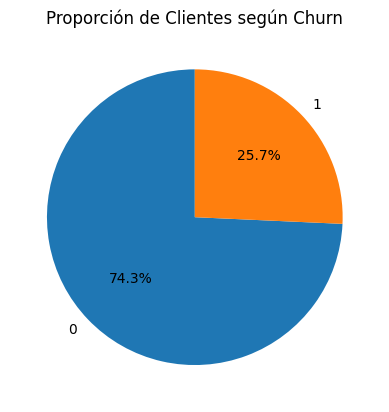

In [148]:
plt.figure()
churn_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.title('Proporción de Clientes según Churn')
plt.show()

### 3.2 Evasión por variables categóricas

#### Tipo de contrato
Los contratos Month-to-month presentan la mayor tasa de evasión (41.32%), mientras que los contratos One year (10.93%) y Two year (2.75%) muestran una evasión considerablemente menor.

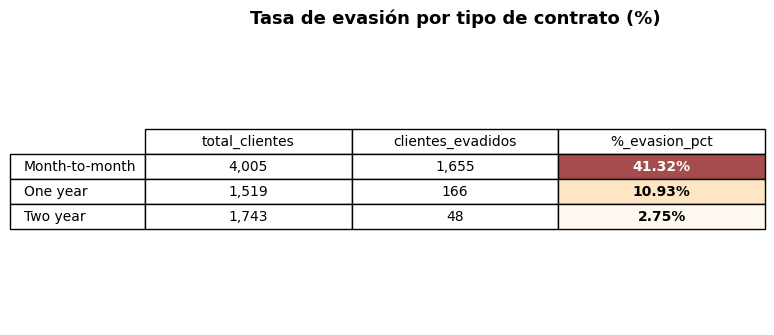

In [149]:
tabla_visual_color(tabla_contrato,'Tasa de evasión por tipo de contrato (%)')

#### Género

La tasa de evasión es similar entre mujeres (26.14%) y hombres (25.31%), indicando que el género no es un factor determinante.

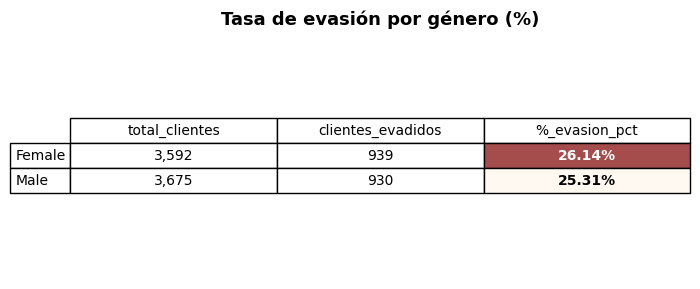

In [150]:
tabla_visual_color(tabla_genero, 'Tasa de evasión por género (%)')

#### Servicio de internet

Los clientes con fibra óptica presentan una evasión elevada (40.56%), frente a DSL (18.45%) y clientes sin internet (7.15%).

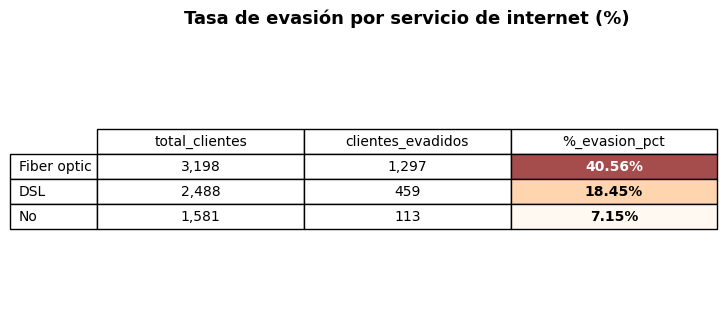

In [151]:
tabla_visual_color(tabla_internet, 'Tasa de evasión por servicio de internet (%)')

#### Método de pago

El cheque electrónico registra la mayor evasión (43.80%), mientras que los pagos automáticos presentan tasas significativamente menores.

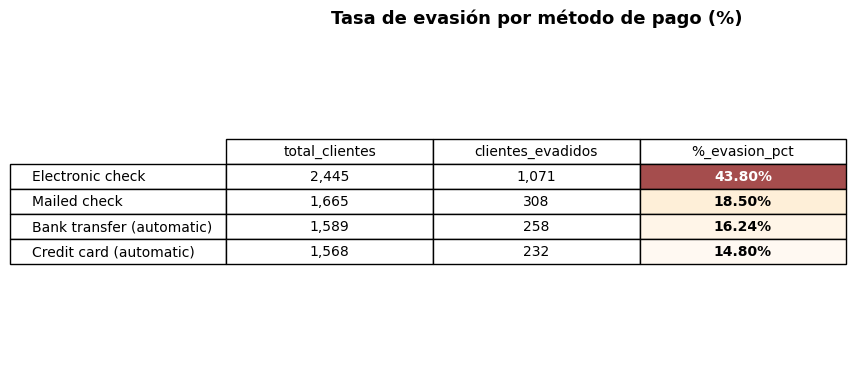

In [152]:
tabla_visual_color(tabla_pago, 'Tasa de evasión por método de pago (%)')

## 4. Conclusiones e Insights

- El tipo de contrato es el factor más influyente en la evasión.

- Los clientes con contratos mensuales y pagos no automáticos presentan mayor riesgo de churn.

- El género no influye significativamente en la evasión.

- La alta evasión en fibra óptica sugiere posibles problemas de percepción de valor o calidad del servicio.

- El análisis de las variables numéricas muestra que la evasión se concentra principalmente en clientes con baja antigüedad, 

- Los clientes que cancelan tienden a presentar cargos mensuales más elevados, lo que sugiere una mayor sensibilidad al precio. 

## 5. Recomendaciones

- Incentivar la migración hacia contratos de largo plazo.

- Promover el uso de métodos de pago automáticos.

- Analizar en profundidad el servicio de fibra óptica.

- Priorizar acciones de retención en clientes con contrato mensual y pago manual.